# Simple introduction to data Visualization
## by (Abdullah Elsayed)

<ul>
<li><a href="#prepare">Data Preparation</a></li>
<li><a href="#plt">Matplotlib</a></li>
<li><a href="#sns">Seaborn</a></li>
<li><a href="#go">Plotly</a></li>
</ul>

## 1- Preparation 
### Pandas
> pandas is a software library written for the Python programming language for data manipulation and analysis

In [1]:
import pandas as pd
import numpy as np

Lets Load data

In [2]:
df= pd.read_csv('temporal.csv')
df.head()

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1


<a id='pp'></a>
## Pandas_Profiling 
> Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. ... In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable.

In [3]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df, explorative=True, title='data Exploration')
prof.to_file(output_file='report.html')

In [4]:
## Convert to datetime
df['Mes'] = pd.to_datetime(df['Mes'])

<a id='plt'></a>
## 2- Matplotlib

> Matplotlib is the most basic library for visualizing data graphically. It includes many of the graphs that we can think of. Just because it is basic does not mean that it is not powerful, many of the other data visualization libraries we are going to talk about are based on it.


In [5]:
import matplotlib.pyplot as plt

Now let’s create the simplest graph possible:

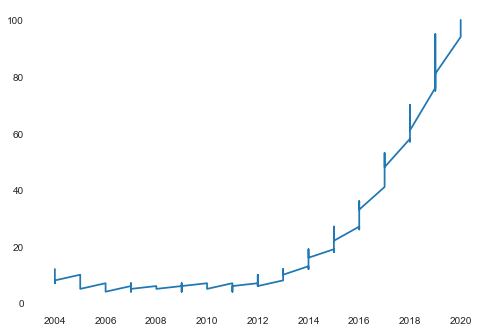

In [6]:
plt.plot(df['Mes'].dt.year, df['data science'])
plt.show()

We can make the graphs of multiple variables in the same graph and thus compare them

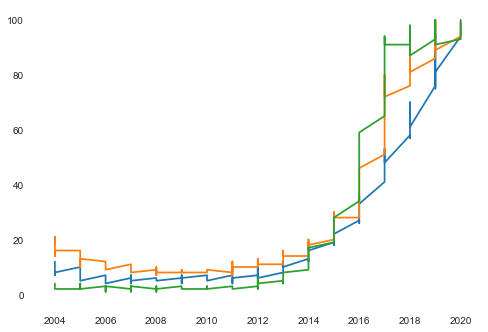

In [7]:
plt.plot(df['Mes'].dt.year, df['data science'], label='data science')
plt.plot(df['Mes'].dt.year, df['machine learning'], label='machine')
plt.plot(df['Mes'].dt.year, df['deep learning'], label='deep')
plt.show()

It is not very clear which variable each color represents. We’re going to improve the chart by adding a legend and titles.


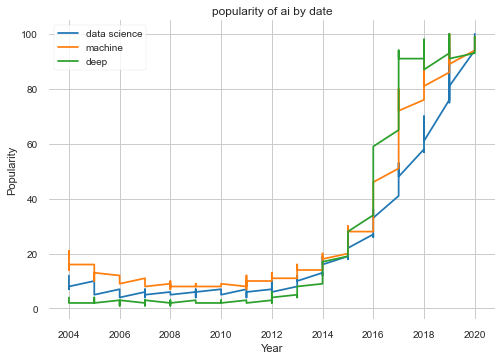

In [8]:
plt.plot(df['Mes'].dt.year, df['data science'], label='data science')
plt.plot(df['Mes'].dt.year, df['machine learning'], label='machine')
plt.plot(df['Mes'].dt.year, df['deep learning'], label='deep')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('popularity of ai by date')
plt.legend()
plt.grid(True)
plt.show()

We can make multiple graphics in one figure. This goes very well for comparing charts or for sharing data from several types of charts easily with a single image

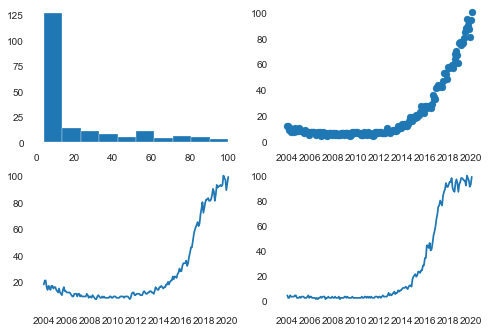

In [9]:
fig, ax = plt.subplots(2,2)
ax[0, 0].hist(df['data science'])
ax[0, 1].scatter(df['Mes'], df['data science'])
ax[1, 0].plot(df['Mes'], df['machine learning'])
ax[1, 1].plot(df['Mes'], df['deep learning'])
plt.show()

Now let’s see a few examples of the different graphics we can do with Matplotlib. We start with a scatterplot:

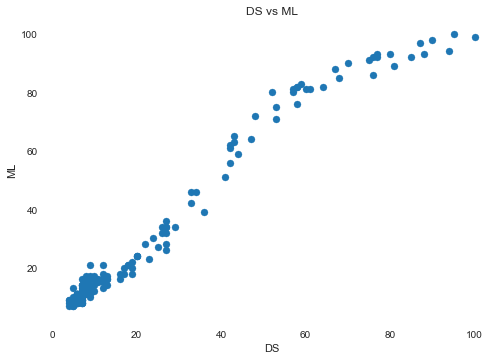

In [10]:
plt.scatter(df['data science'], df['machine learning'])
plt.xlabel('DS')
plt.ylabel('ML')
plt.title('DS vs ML')
plt.show()

Example of a bar chart:

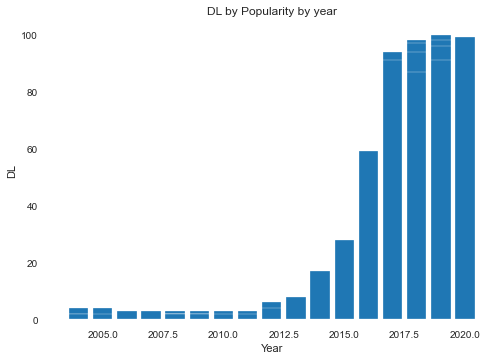

In [11]:
plt.bar(df['Mes'].dt.year, df['deep learning'])
plt.xlabel('Year')
plt.ylabel('DL')
plt.title('DL by Popularity by year')
plt.show()

Example of a Histogram:

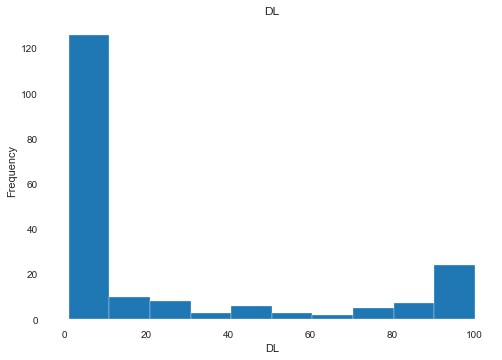

In [12]:
plt.hist(df['deep learning'])
plt.xlabel('DL')
plt.ylabel('Frequency')
plt.title('DL')
plt.show()

<a id='sns'></a>

## 3- Seaborn 
> Seaborn is a library based on Matplotlib. Basically what it gives us are nicer graphics and functions to make complex types of graphics with just one line of code.


Let's Import the package

In [13]:
import seaborn as sns

Plot a simple scattrt plot

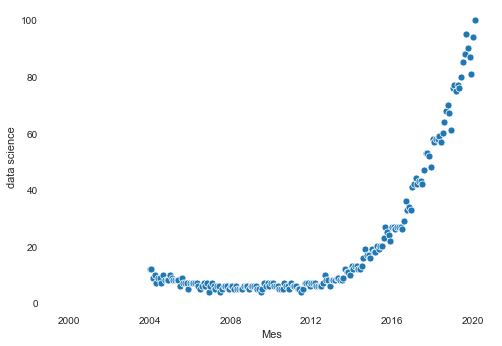

In [14]:
sns.scatterplot(data=df, x='Mes', y='data science')
sns.set() ## use this code to initialize the style of graphics
plt.show()

We can add information of more than two variables in the same graph

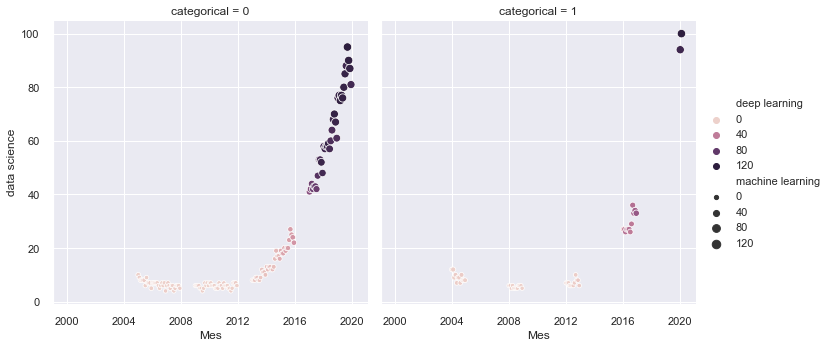

In [15]:
## Quantitative data

sns.relplot(data=df, x='Mes',
            y='data science',
            hue='deep learning',
            size='machine learning',
           col = 'categorical',
           kind='scatter')
plt.show()

To Show all the correlations between variables use heat map

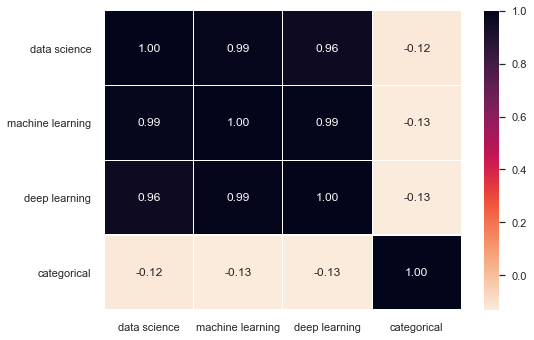

In [16]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidth=0.1, cmap = sns.cm.rocket_r)
plt.show()

 pairplot shows us the relationships between all the variables.

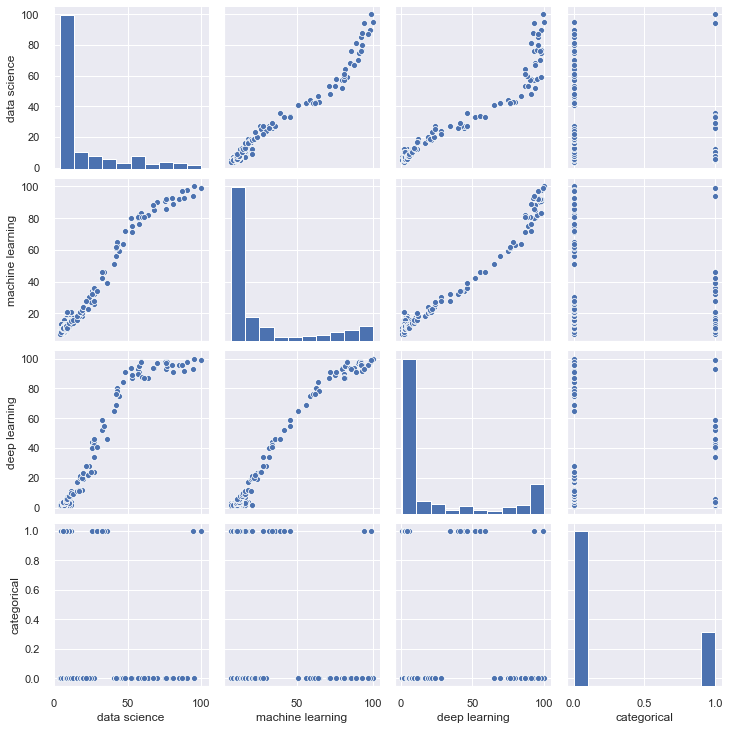

In [17]:
sns.pairplot(df)
plt.show()

Show more information about variables on pair plot

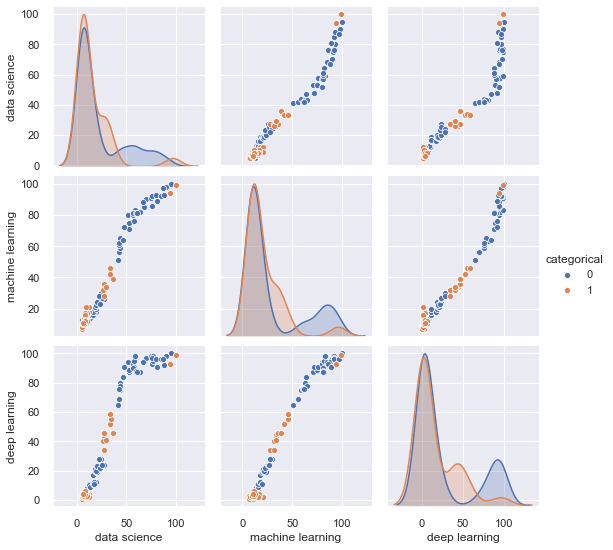

In [18]:
sns.pairplot(df, hue='categorical')
plt.show()

jointplot allows us to see a scatterplot together with a histogram of the two variables and see how they are distributed:

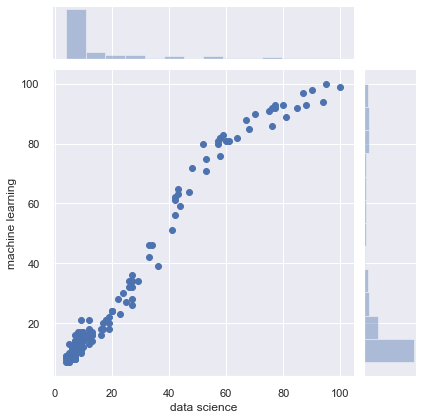

In [19]:
sns.jointplot(data=df, x='data science', y='machine learning')
plt.show()

To visualize relationship between gualitative variable vs quanitiative variable you can use Violin plot

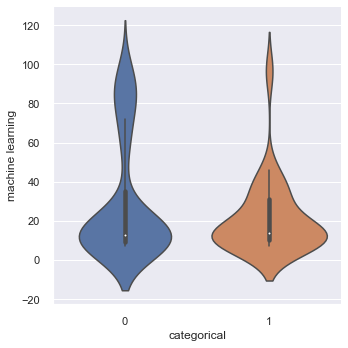

In [20]:
sns.catplot(data=df, kind='violin', x='categorical', y='machine learning')
plt.show()

<a id='go'></a>

## 4- Plotly
> Open Source Graphing Library Plotly's Python graphing library makes interactive, publication-quality graphs.


Let's import plotly

In [21]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

Plot a histogram

In [22]:
df['data science'].iplot(kind = 'hist')

Improve the histogram

In [23]:
df['data science'].iplot(kind='hist', title='Data Science Distribution', xTitle = 'Data Science', yTitle='Frequency')

Visualize Relationship between deep learning and machine learning

In [24]:
data = df[['machine learning', 'deep learning']].set_index('machine learning')
data.iplot(title='Deep VS Machine',
           xTitle = 'Machine',
           yTitle='Deep',
          mode='markers')

Interactive heatmap by plotly

In [25]:
import plotly.figure_factory as ff

In [26]:
figure = ff.create_annotated_heatmap(z=df.corr().values,
                                     x=list(df.corr().columns),
                                     y = list(df.corr().columns),
                                     annotation_text=df.corr().round(2).values,
                                    showscale=True)

figure

## Conclusion
> This project for education purpose.

>For the initial phases of a project, with pandas and pandas profiling we will make a quick visualization to understand the data. If we need to visualize more information we could use simple graphs that we can find in matplotlib as scatterplots or histograms.
For advanced phases of the project, we can search the galleries of the main libraries (Matplotlib, Seaborn, Bokeh, Plotly) for the graphics that we like and fit the project. These graphics can be used to give information in reports, make interactive reports, search for specific values, …